In [1]:
import scipy.stats as scs
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
mu_actual = 5
sigma_actual = 2
data = scs.norm(mu_actual, sigma_actual).rvs(10)

In [3]:
data

array([ 5.06074704,  2.33506219,  4.45387298,  2.96158157,  2.49079975,
        5.65681675,  4.81312936,  7.86739383,  3.19071384,  8.96720741])

In [4]:
data.mean()

4.7797324737412676

In [5]:
data.std()

2.1229795925172161

In [6]:
with pm.Model() as model_normal:
    # prior
    mu = pm.Uniform("mu", 0, 10)
    # likelihood
    observed = pm.Normal("observed", mu, 2, observed=data)

In [7]:
with model_normal:
    estimate = pm.find_MAP()
estimate

logp = -24.118, ||grad|| = 1.3767: 100%|██████████| 6/6 [00:00<00:00, 1145.31it/s]


{'mu': array(4.779732495444818), 'mu_interval__': array(-0.08816406502358215)}

In [8]:
with model_normal:
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_interval__]
100%|██████████| 10500/10500 [00:04<00:00, 2368.98it/s]


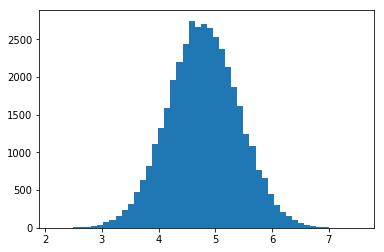

In [9]:
fig, ax = plt.subplots()
ax.hist(trace['mu'], bins=50)
plt.show()

In [10]:
df_scores = pd.read_csv('data/scores.csv')

In [11]:
df_scores.head()

,group,score
0,1,0.90
1,1,0.78
2,1,0.68
3,1,0.32
4,1,0.47


In [12]:
df_scores.score.describe()

count    81.000000
mean      0.753827
std       0.169105
min       0.050000
25%       0.660000
50%       0.780000
75%       0.880000
max       1.000000
Name: score, dtype: float64

In [13]:
df_scores.groupby('group').mean()

,score
group,
1,0.766316
2,0.736364
3,0.793077
4,0.773333
5,0.708500


In [14]:
with pm.Model() as model_scores:
    mu = pm.Uniform('mu', 0, 1)
    sigma = pm.HalfNormal('sigma', 1)
    sd = pm.HalfNormal('sd', 1)
    eta1 = pm.Normal('eta1', mu, sigma)
    eta2 = pm.Normal('eta2', mu, sigma)
    eta3 = pm.Normal('eta3', mu, sigma)
    eta4 = pm.Normal('eta4', mu, sigma)
    eta5 = pm.Normal('eta5', mu, sigma)
    obs1 = pm.Normal('obs1', eta1, sd, observed=df_scores[df_scores.group==1].values)
    obs2 = pm.Normal('obs2', eta2, sd, observed=df_scores[df_scores.group==2].values)
    obs3 = pm.Normal('obs3', eta3, sd, observed=df_scores[df_scores.group==3].values)
    obs4 = pm.Normal('obs4', eta4, sd, observed=df_scores[df_scores.group==4].values)
    obs5 = pm.Normal('obs5', eta5, sd, observed=df_scores[df_scores.group==5].values)



In [15]:
with model_scores:
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta5, eta4, eta3, eta2, eta1, sd_log__, sigma_log__, mu_interval__]
100%|██████████| 10500/10500 [00:21<00:00, 485.64it/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f403d0452e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f403cdc3d68>]], dtype=object)

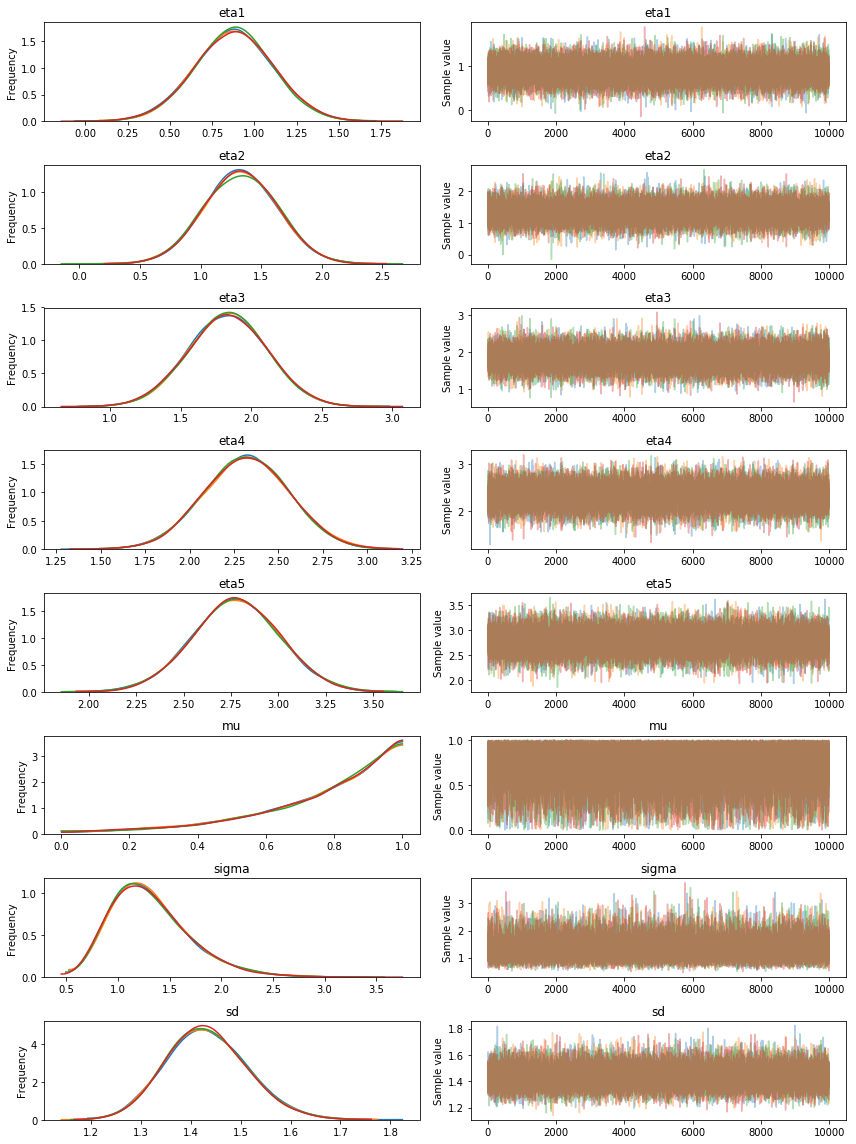

In [16]:
pm.traceplot(trace)

In [17]:
list(trace)

[{'eta1': 0.7470595042622904,
  'eta2': 0.61925982072772812,
  'eta3': 1.7267935942813728,
  'eta4': 2.2950680408793533,
  'eta5': 2.9699271669390339,
  'mu': 0.56787666672596637,
  'mu_interval__': 0.27319321790943846,
  'sd': 1.4170320699246821,
  'sd_log__': 0.34856459272109108,
  'sigma': 1.6884905670098924,
  'sigma_log__': 0.52383497421839986},
 {'eta1': 0.69738744975211675,
  'eta2': 1.7316068143250418,
  'eta3': 1.8753345570530928,
  'eta4': 2.4742766654531847,
  'eta5': 2.9138653532800585,
  'mu': 0.41082253191543516,
  'mu_interval__': -0.36056611689775425,
  'sd': 1.3735541770231039,
  'sd_log__': 0.31740167027699145,
  'sigma': 1.8220826426676451,
  'sigma_log__': 0.59998015602406729},
 {'eta1': 0.87179392393469091,
  'eta2': 0.9932741660942549,
  'eta3': 2.0901938271100446,
  'eta4': 2.1638508271369798,
  'eta5': 2.739456075029346,
  'mu': 0.9916942170925952,
  'mu_interval__': 4.7824628028411045,
  'sd': 1.49317576815271,
  'sd_log__': 0.40090523979422066,
  'sigma': 0.73

In [18]:
probs= np.ones(10)/10
sd=3

The probability of N(0, 3) being correct is 0.0208
The probability of N(1, 3) being correct is 0.0383
The probability of N(2, 3) being correct is 0.0632
The probability of N(3, 3) being correct is 0.0933
The probability of N(4, 3) being correct is 0.1231
The probability of N(5, 3) being correct is 0.1455
The probability of N(6, 3) being correct is 0.1538
The probability of N(7, 3) being correct is 0.1455
The probability of N(8, 3) being correct is 0.1231
The probability of N(9, 3) being correct is 0.0933


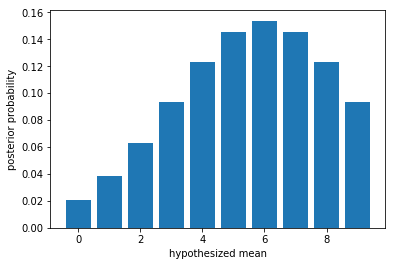

In [19]:
datum = 6

for i in range(10):
    probs[i] *= scs.norm(i, sd).pdf(datum)
probs /= probs.sum()

for i in range(0,10):
    print("The probability of N({0}, {1}) being correct is {3:6.4f}"
           .format(i, sd, datum, probs[i]))

fig, ax = plt.subplots()
ax.bar(range(10), probs)
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('posterior probability')
plt.show()